# Smoothing particles

In [1]:
# Libraries ----
import sys  # type: ignore
import imageio  # type: ignore
import warnings
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

sys.path.append('../modules')
import track_particles as tp  # type: ignore
import plot_tracking as plt_tp  # type: ignore
import plot_smoothing as plt_sp  # type: ignore
import plot_clustering as plt_cp  # type: ignore
import smoothing_particles as sp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2025-02-18"

ordering = True
video_name = "3n_2m_1f_240216_2"
n_particles = int(video_name[0])
save_figures = True
x_bounds = [0, 1080]
y_bounds = [50, 1870]
x_zoom = [0, 1080]
y_zoom = [0, 1920]

## Load tracked data

In [3]:
df_tracked = pd.read_csv("{}/clustered_{}.csv".format(output_path, video_name), low_memory=False)
df_tracked.head(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,0,0,70.053519,835.262190,70.285445,833.021848,0.0,32.0,743.0,0.533333,32.0,745.0,0.110247,7773.0,151.905756,73.670371,0.874528,3,NaN,NaN,NaN,NaN,False,False,False
1,1,0,1666.290536,960.906710,1668.161017,955.096531,0.0,1676.0,855.0,0.435294,1669.0,891.0,0.584943,7407.0,131.938942,87.825284,0.746263,3,NaN,NaN,NaN,NaN,False,False,False
2,2,0,1451.011496,977.052698,1450.553844,973.625198,0.0,1449.0,908.0,0.450980,1441.0,1006.0,0.696023,11917.0,166.249413,103.287380,0.783589,3,NaN,NaN,NaN,NaN,False,False,False


In [4]:
df_tracked.tail(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
17997,0,17997,1299.541430,106.451527,1299.091509,109.140170,NaN,1299.541430,106.451527,NaN,1299.541430,106.451527,-1.319439,10934.0,155.648922,118.800669,0.646091,3,3.0,0.000466,-0.003454,0.000417,False,False,False
17998,1,17997,886.023144,121.206972,902.712883,126.371918,0.0,798.000000,69.000000,0.658824,804.000000,79.000000,1.359536,17326.0,242.843180,95.010873,0.920287,3,3.0,-0.001190,0.000620,0.000083,False,False,False
17999,2,17997,312.630153,259.131694,324.814484,263.851414,NaN,312.630153,259.131694,NaN,312.630153,259.131694,1.255368,12324.0,206.346226,85.843134,0.909358,3,3.0,0.731373,-0.183080,-0.009462,False,False,False


## Swapping mixed IDs

In [5]:
omega_threshold = 20 * np.pi / 180  # Angular velocity per frame (in degrees)
velocity_threshold = 83  # Velocity per frame limited with half average size of particle
print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")
delta = 400

from importlib import reload
reload(sp)

arg_list = [
    # VIDEO 1
    [0    , 18000, velocity_threshold, omega_threshold, True],
    # [10000, 20000, velocity_threshold, omega_threshold, True],
    # [20000, 30000, velocity_threshold, omega_threshold, True],
    # [30000, 40000, velocity_threshold, omega_threshold, True],
    # [40000, 50000, velocity_threshold, omega_threshold, True],
    # [50000, 54000, velocity_threshold, omega_threshold, True],
    # [60000, 68400, velocity_threshold, omega_threshold, True],
    # [70000, 80000, velocity_threshold, omega_threshold, True],
    # [80000, 90000, velocity_threshold, omega_threshold, True],
    # [90000, 100000, velocity_threshold, omega_threshold, True],
    # [100000, 108000, velocity_threshold, omega_threshold, True]
]

df_final = sp.smooth_frames(
    df_tracked=df_tracked,
    arg_list=arg_list,
    order=False,
    log_path=log_path,
    log_filename="log_{}".format(video_name),
    verbose=1,
    tqdm_bar=True
)

df_final.head(8)

Thresholds:
	- Velocity: 83 
	- Angle: 20.0 



100%|█████████████████████████| 1/1 [00:54<00:00, 54.87s/it]


,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,True,0,chunk_00000_18000,0,0,70.053519,835.262190,70.285445,833.021848,0.0,32.000000,743.000000,0.533333,32.000000,745.000000,0.110247,0.110247,7773.0,151.905756,73.670371,0.874528,3,NaN,NaN,NaN,NaN,False,False,False
1,True,0,chunk_00000_18000,1,1,1666.290536,960.906710,1668.161017,955.096531,0.0,1676.000000,855.000000,0.435294,1669.000000,891.000000,0.584943,0.584943,7407.0,131.938942,87.825284,0.746263,3,NaN,NaN,NaN,NaN,False,False,False
2,True,0,chunk_00000_18000,2,2,1451.011496,977.052698,1450.553844,973.625198,0.0,1449.000000,908.000000,0.450980,1441.000000,1006.000000,0.696023,0.696023,11917.0,166.249413,103.287380,0.783589,3,NaN,NaN,NaN,NaN,False,False,False
3,True,3,chunk_00000_18000,0,0,70.108469,835.239301,70.359330,833.023418,0.0,32.000000,743.000000,0.533333,32.000000,745.000000,-0.111218,-0.111218,7781.0,151.775844,73.731503,0.874074,3,3.0,0.018317,-0.007630,-0.000324,False,False,False
4,True,3,chunk_00000_18000,1,1,1655.595333,984.687182,1656.257757,981.760819,0.0,1660.659193,931.757848,0.435294,1656.159193,950.257848,-0.591800,-0.591800,7493.0,131.950613,88.707587,0.740298,3,3.0,-3.565068,7.926824,-0.002286,False,False,False
5,True,3,chunk_00000_18000,2,2,1451.016537,977.001343,1450.592902,973.561086,0.0,1474.000000,907.000000,0.450980,1486.000000,1007.000000,-0.696596,-0.696596,11913.0,166.362459,103.269397,0.784009,3,3.0,0.001680,-0.017118,-0.000191,False,False,False
6,True,6,chunk_00000_18000,0,0,69.935702,835.555382,69.919846,833.556585,0.0,32.000000,743.000000,0.533333,32.000000,744.000000,-0.104673,-0.104673,7683.0,151.311614,73.029993,0.875815,3,3.0,-0.057589,0.105360,0.002182,False,False,False
7,True,6,chunk_00000_18000,1,1,1655.497691,984.512961,1656.110172,981.651422,0.0,1660.920814,932.294118,0.419608,1658.420814,950.294118,-0.600375,-0.600375,7382.0,129.958172,88.941840,0.729118,3,3.0,-0.032548,-0.058074,-0.002858,False,False,False


In [6]:
df_final.tail(5)

,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
17994,True,17994,chunk_00000_18000,0,1,1299.540031,106.461890,1299.087362,109.174568,NaN,1299.540031,106.461890,NaN,1299.540031,106.461890,-1.320690,-1.320690,10929.0,155.642330,118.824707,0.645870,3,3.0,-0.020716,0.016504,0.001346,False,False,False
17995,True,17994,chunk_00000_18000,1,2,886.026714,121.205112,902.716673,126.375891,0.0,798.000000,69.000000,0.658824,801.000000,79.000000,1.359287,-1.359287,17332.0,242.865686,95.026336,0.920275,3,3.0,-0.010137,0.005105,0.000237,False,False,False
17999,True,17997,chunk_00000_18000,2,0,312.630153,259.131694,324.814484,263.851414,NaN,312.630153,259.131694,NaN,312.630153,259.131694,1.255368,-1.255368,12324.0,206.346226,85.843134,0.909358,3,3.0,0.731373,-0.183080,-0.009462,False,False,False
17997,True,17997,chunk_00000_18000,0,1,1299.541430,106.451527,1299.091509,109.140170,NaN,1299.541430,106.451527,NaN,1299.541430,106.451527,-1.319439,-1.319439,10934.0,155.648922,118.800669,0.646091,3,3.0,0.000466,-0.003454,0.000417,False,False,False
17998,True,17997,chunk_00000_18000,1,2,886.023144,121.206972,902.712883,126.371918,0.0,798.000000,69.000000,0.658824,804.000000,79.000000,1.359536,-1.359536,17326.0,242.843180,95.010873,0.920287,3,3.0,-0.001190,0.000620,0.000083,False,False,False


## Interpolation over not allowed frames

In [7]:
if ordering:
    df_full = df_final.copy().sort_values(["time", "permuted_id"])
    for id_ in range(len(df_full["permuted_id"].unique())):
        mask = df_full.loc[:,"permuted_id"]==df_full["permuted_id"].unique()[id_]
        df_full[mask]=df_full[mask].interpolate(method="linear")

In [8]:
if ordering:
    cols = [
        "id", "permuted_id", "time", "position_x", "position_y", "weighted_x", "weighted_y",
        "darkest_v", "darkest_x", "darkest_y", "lightest_v", "lightest_x", "lightest_y",
        "orientation", "corrected_orientation", "area", "axis_major", "axis_minor", "eccentricity"
    ]
    df_temp = df_full[cols]
    df_temp.to_csv("{}/interpolated_{}.csv".format(output_path, video_name), index=False)
    df_temp

Thresholds:
	- Velocity: 12.312684807769985 
	- Angle: 16.039799730500025 



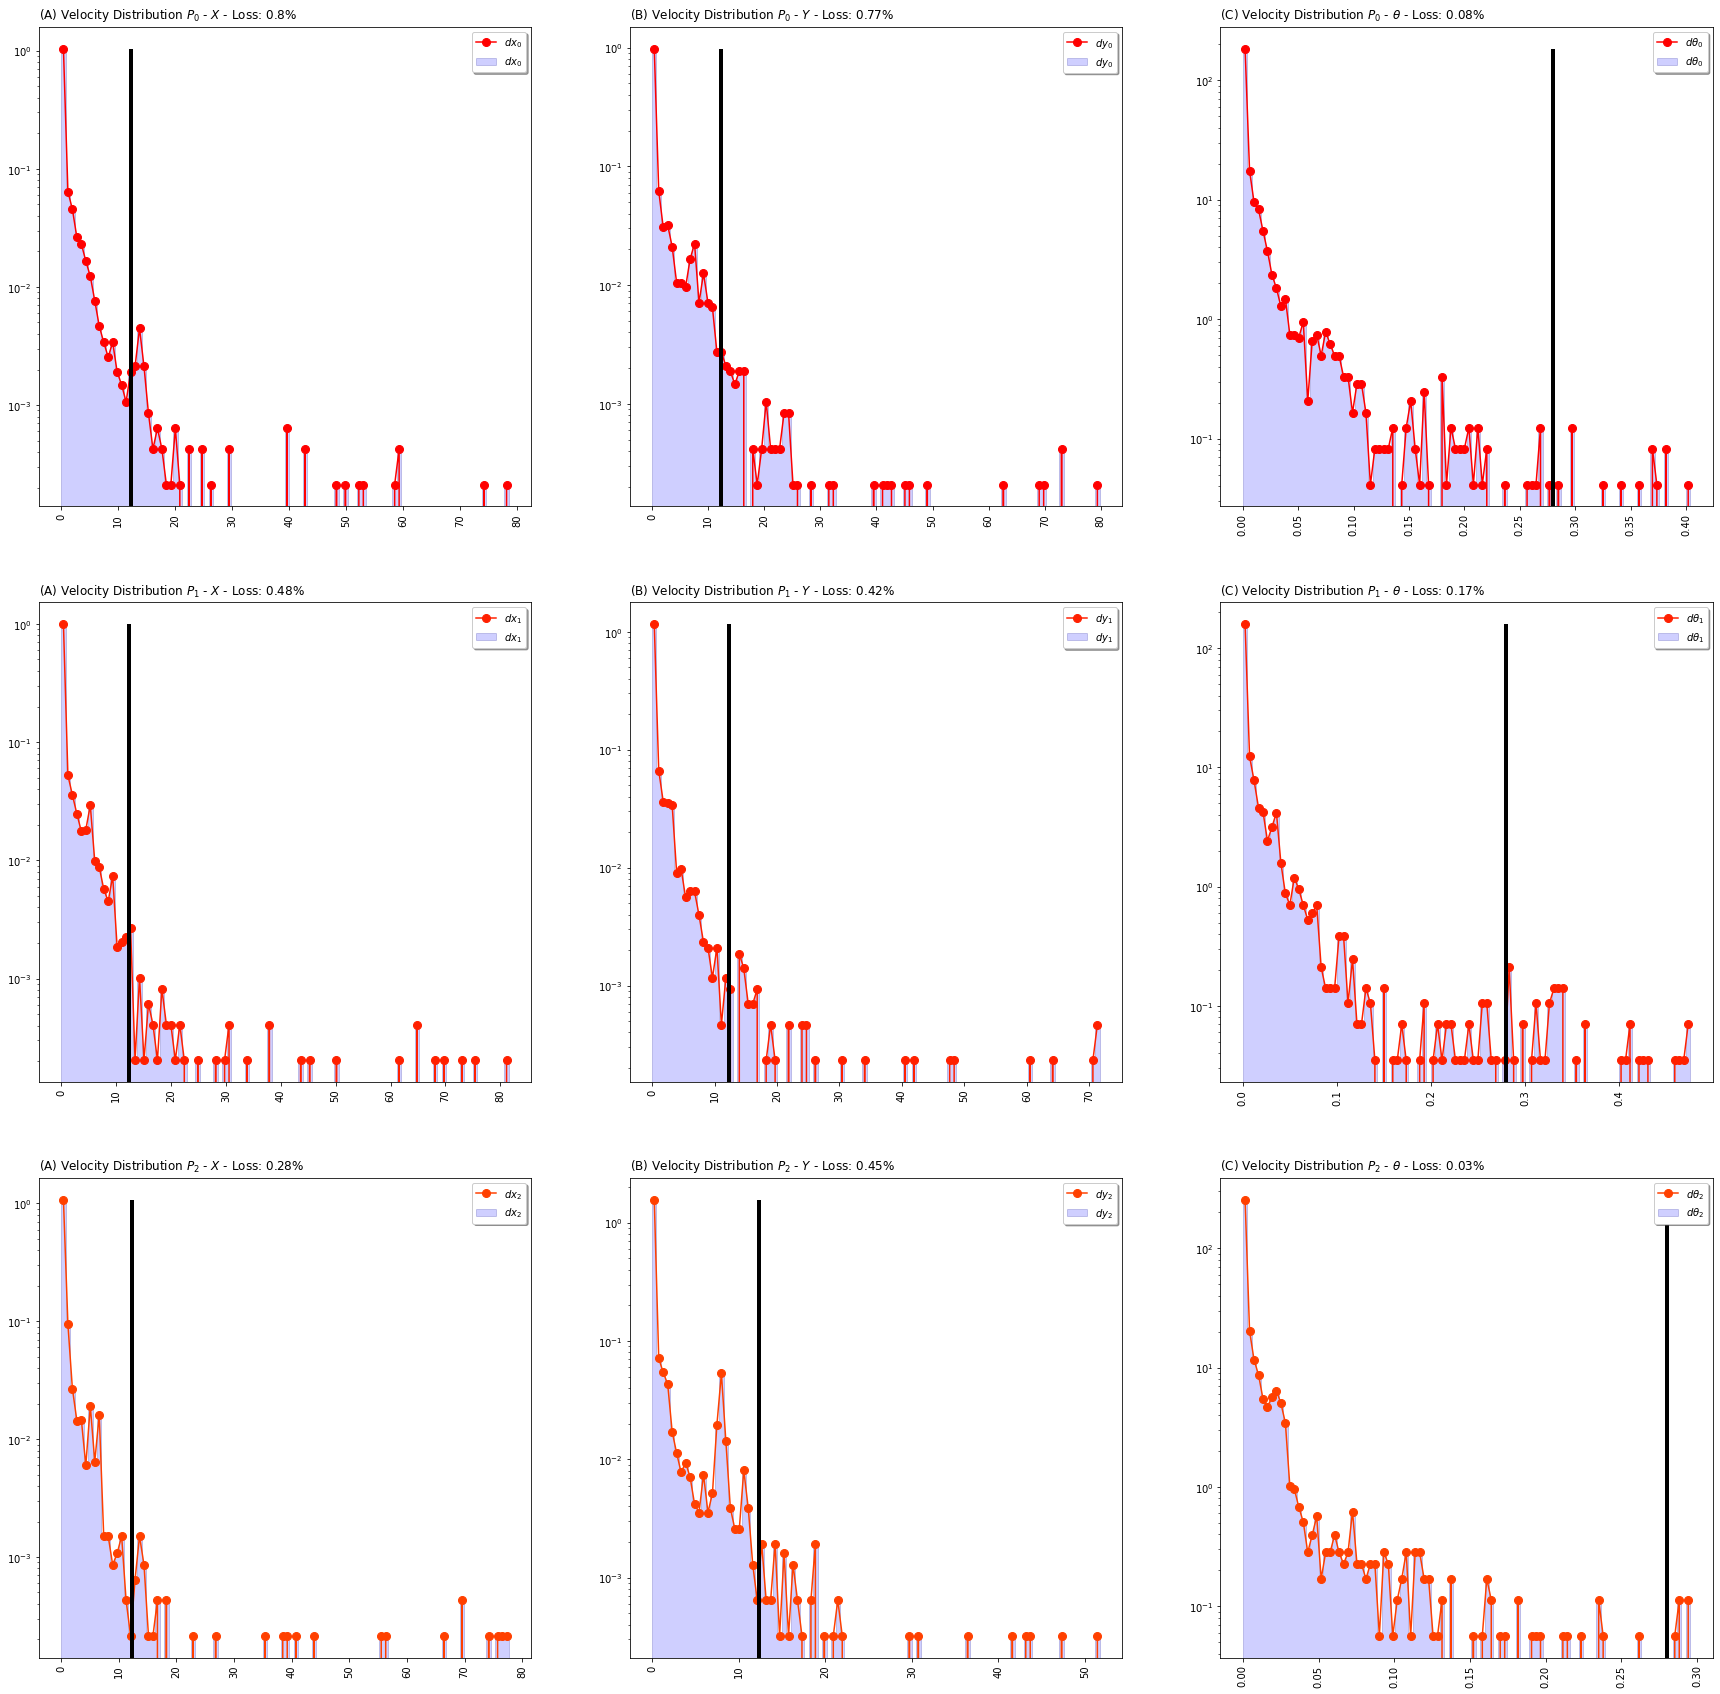

In [9]:
if ordering:
    bins = 100
    width = 10
    fancy_legend = True
    omega_threshold = df_full["velocity_orientation"].abs().quantile(0.9965) # Angular velocity per frame
    velocity_threshold = df_full["velocity_x"].abs().quantile(0.9901) # Velocity per frame limited with half average size of particle
    print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")

    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_cp.plot_velocities_distribution(
        df_tracked=df_smooth,
        bins=bins,
        velocity_threshold=velocity_threshold,
        omega_threshold=omega_threshold,
        width=width,
        fancy_legend=fancy_legend
    )

Original


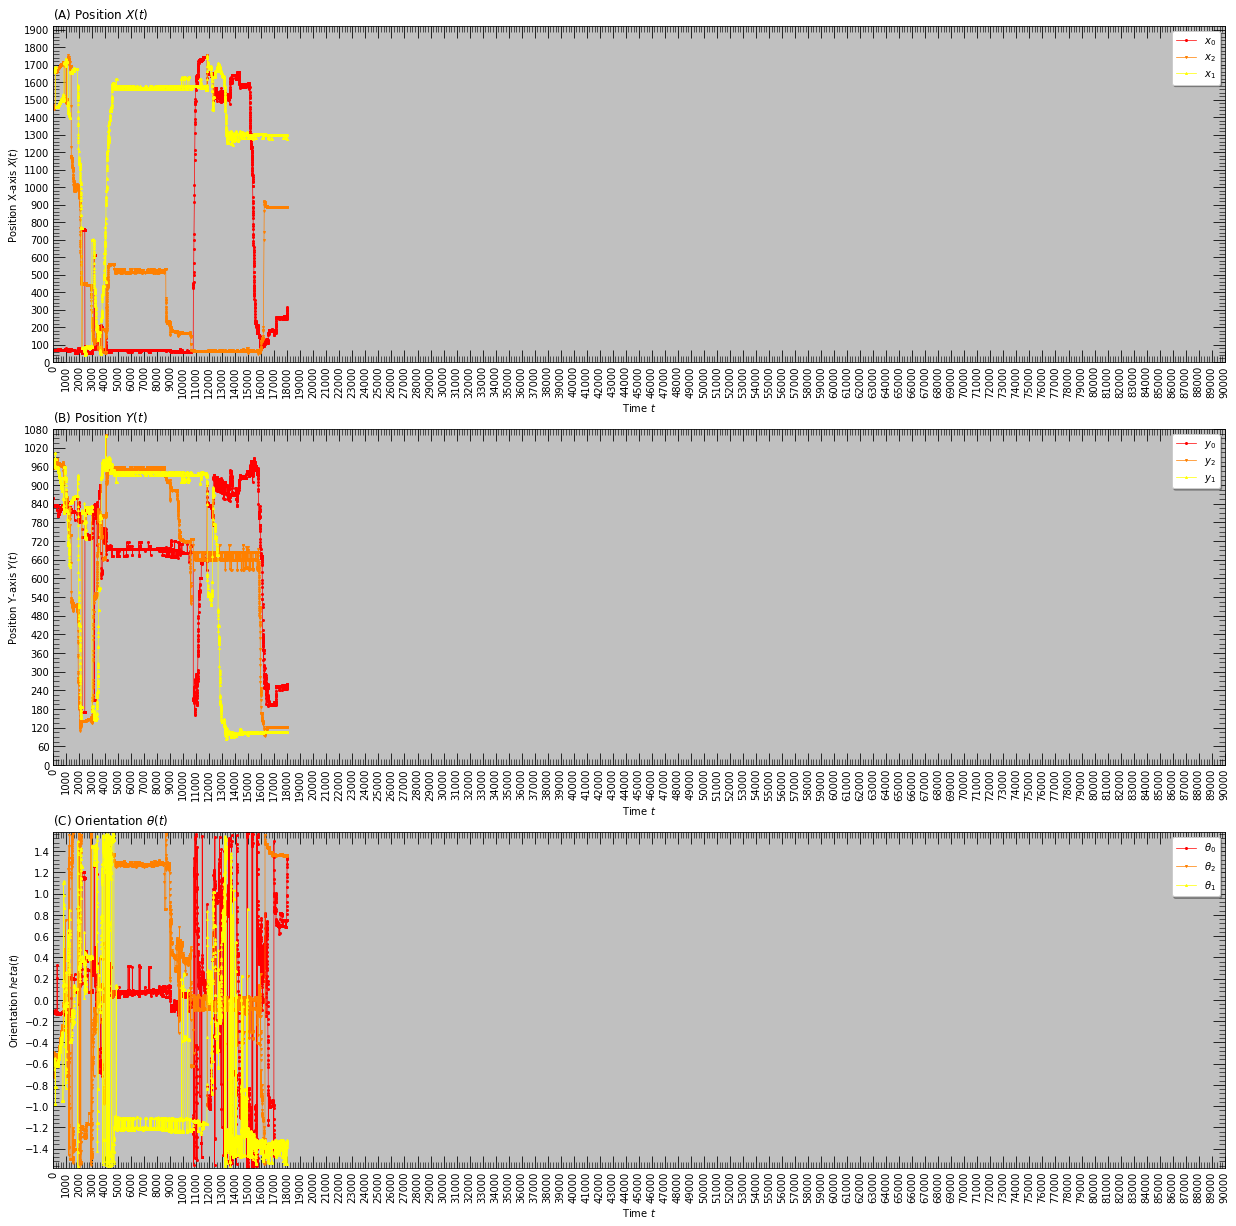

Corrected Orientation


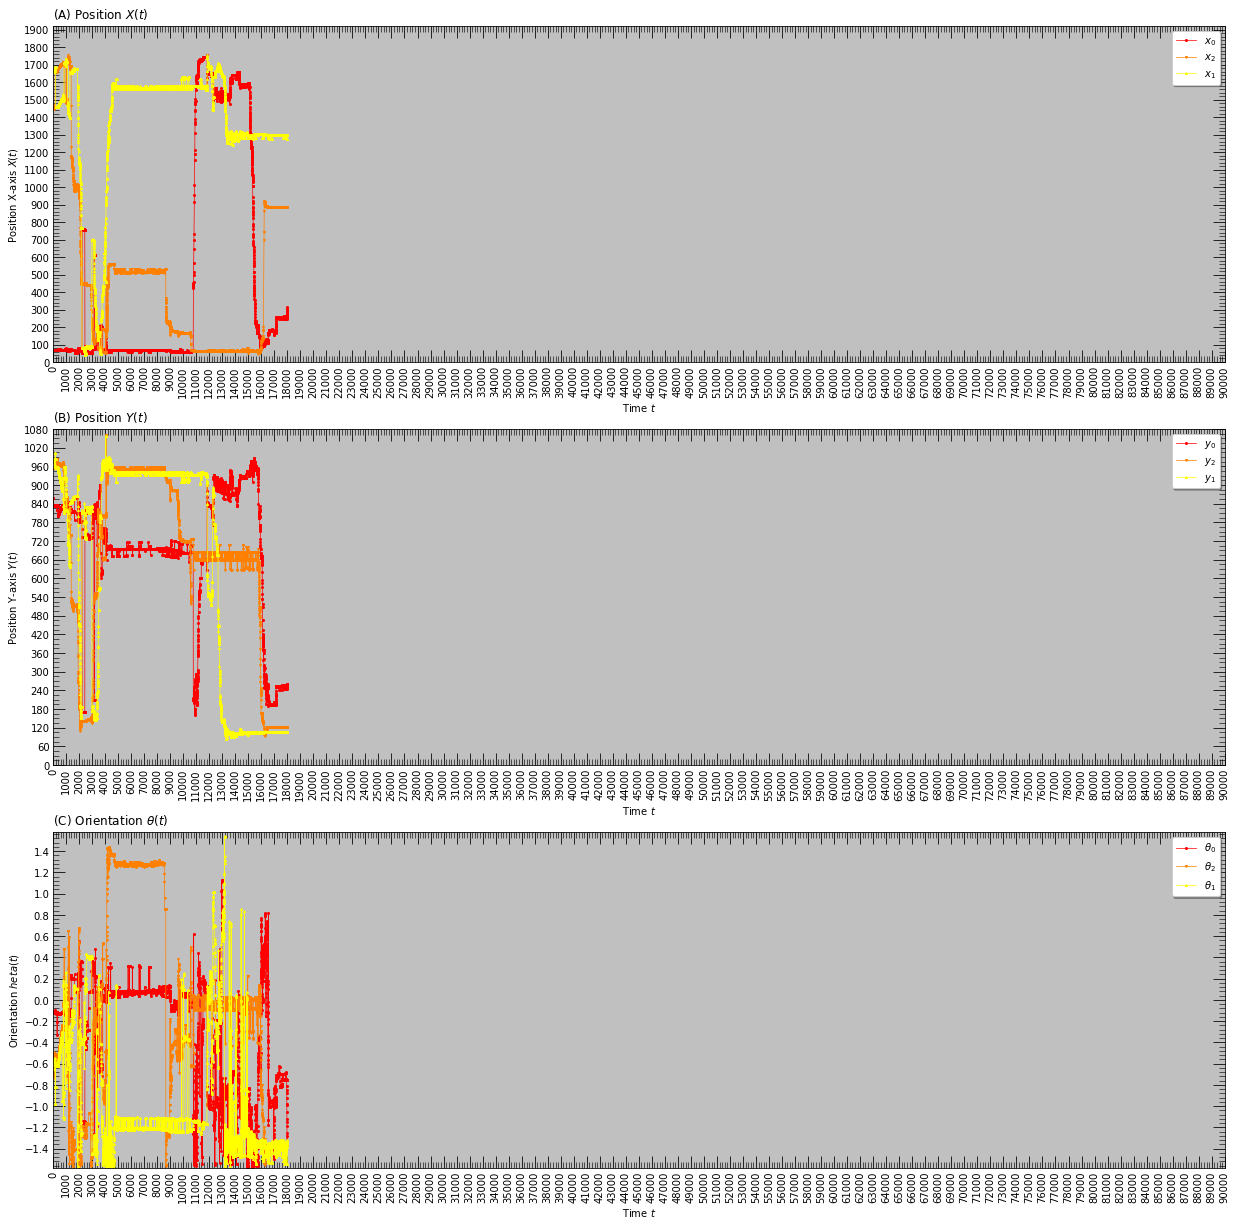

In [10]:
if ordering:
    width = 21
    n_x_breaks = 100
    n_y_breaks = 20
    t0, tf   = 0, 90000  # 22200, 24300
    t0_, tf_ = 0, 90000  # 22200, 24300
    t_bounds = [t0_, tf_]
    p_bounds = [[0, 1920], [0, 1080], [-1.58, 1.58]]
    fancy_legend = True

    print("Original")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    velocity_threshold = df_full["velocity_x"].abs().quantile(0.9701) # Velocity per frame limited with half average size of particle
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[((df_smooth["velocity_x"] <= velocity_threshold) & (df_smooth["velocity_y"] <= velocity_threshold))],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend
    )

    print("Corrected Orientation")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[((df_smooth["velocity_x"] <= velocity_threshold) & (df_smooth["velocity_y"] <= velocity_threshold))],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend
    )

## Setting video information

In [11]:
# # Load the video
# reader = imageio.get_reader("{}/{}.mp4".format(input_path, video_name), "ffmpeg")

# # Check the number of frames
# num_frames = reader.count_frames()
# print("Total frames: {}".format(num_frames))

# # Extract a frame to inspect the content
# time = 0
# frame = reader.get_data(time)
# print("Frames resolution: {} x {}".format(frame.shape[0], frame.shape[1]))

## Comparative of process

In [12]:
# # Original frame
# time = 209  #271  # 209  # 80
# times = [time - 1, time, time + 1]
# reinforce_boundaries = True
# remove_holes = False
# type = "local equalized"
# clip_limit = 0.05
# threshold = 0.19
# sigma = 1.5
# x_bounds = x_bounds  # [40, 1020]
# y_bounds = y_bounds  # [160, 1740]
# region_area_min = 200
# axis_major_min = 94
# eccentricity_max = 0.99


# df_tracked_frame_0 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[0], reader.get_data(times[0])]
# )

# df_tracked_frame_1 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[1], reader.get_data(times[1])]
# )

# df_tracked_frame_2 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[2], reader.get_data(times[2])]
# )

# df_tracked_old = pd.concat([df_tracked_frame_0, df_tracked_frame_1, df_tracked_frame_2], ignore_index=True)

# width = 10
# n_x_breaks = 20
# n_y_breaks = 20
# fancy_legend = True
# x_legend = 1.001
# y_legend = 0.891

# df_smooth = df_full.copy()
# df_smooth["id"] = df_smooth["permuted_id"]
# df_smooth["orientation"] = df_smooth["corrected_orientation"]

# fig = plt_sp.plot_all_process_frame(
#     reader=reader,
#     times=times,
#     df_tracked=df_tracked_old,
#     df_clustered=df_tracked,
#     df_smoothed=df_smooth,
#     width=width,
#     n_x_breaks=n_x_breaks,
#     n_y_breaks=n_y_breaks,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     fancy_legend=fancy_legend,
#     x_legend=x_legend,
#     y_legend=y_legend
# )